# Exploring the music21 library in python

To import the library, you can either use:

In [4]:
from music21 import *

or:

In [ ]:
import music21

The smallest unit of any musical piece is a note. music21 lets us create these note objects and play with the pitch and octave of these notes.

The rest of the notebook will be compliant with the first import code. Make sure to run 'from music21 import *' before proceeding forward. This creates a namespace called music21 and we dont have to mention the library name while calling any classes 

We'll create an F note 

In [5]:
f = note.Note("F5")

In [6]:
print (f)

<music21.note.Note F>


We can check out the name, octave, pitch and frequency attributes of the created note.

In [7]:
print(f.name, f.octave)

F 5


In [8]:
print(f.pitch)

F5


In [10]:
print(f.pitch.frequency)

698.456462866008


Accidentals raise or lower the immediately follwing note from its normal pitch - they include sharps and flats. In music21, sharps are symbolised as '#' and flats are symbolised as '-'.

First lets create a note with an accidental and then analyse the available attributes of an accidental. 
Here we have created a B flat note in the 2nd octave.

In [11]:
f = note.Note('B-2')

In [12]:
print(f.pitch.accidental)

<accidental flat>


As you can see, the accidental we obtained here is not a string or integer, but an object. To find the properties of the accidental as in it's location, how much it alters the normal pitch of the note, we will have to work with this accidental object.

Lets find out the location and the alteration provided by the accidental

In [14]:
acc = f.pitch.accidental
print (acc.alter)
print (acc.displayLocation)

-1.0
normal


The alter here gives -1.0 as its a flat. sharp would have given a positive float. Float results suggest that even quarter-tones are supported by the library.

You can listen to the note.

In [16]:
f.show('midi')

If you’ve installed a MusicXML reader such as MuseScore, Finale, Sibelius, or Finale Notepad, you can type:

In [ ]:
f.show()

Creating a D note by transposing the B-flat up a major third. You can also change the B-flat note itself by setting inPlace = True

In [18]:
d = f.transpose("M3")
print (d)
f.transpose("M3", inPlace=True)
print (f)

<music21.note.Note D>
<music21.note.Note D>


Not every note has an accidental. For example, you can try calling the accidental attribute for the D note. Naturally the name of a non existing accidental will give error

In [22]:
print (d.pitch.accidental)

if d.pitch.accidental is not None:
    print (d.pitch.accidental.name)
else:
    print ("No name for this non existing accidental")

None
No name for this non existing accidental


A note which doesnt have a pitch is called rest. As the name suggests, in a musical piece, a rest is a silent part. Here, since it doesnt have a pitch, trying to access all the pitch attributes will give error.

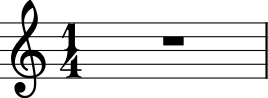

In [105]:
rest = note.Rest()
rest.show('midi') #wont give any vocal output as its supposed to be silent
rest.show()

Pitch object is found in the pitch module, like the note object. Every Note object has a Pitch object inside it. You can access the pitch object inside the note object by using note.Note.pitch

In [28]:
p1 = pitch.Pitch('b-4')
print ("Pitch Name: ", p1.name)
print ("Pitch Octave: ", p1.octave)
print ("Pitch Class: ", p1.pitchClass)
print ("Accidental on pitch: ", p1.accidental.alter)

print("Directly accessing the pitch of a note object: ")
csharp = note.Note("C#4")
print ("Pitch Name: ", csharp.pitch.name)
print ("Pitch Octave: ", csharp.pitch.octave)

Pitch Name:  B-
Pitch Octave:  4
Pitch Class:  10
Accidental on pitch:  -1.0
Directly accessing the pitch of a note object: 
Pitch Name:  C#
Pitch Octave:  4


You can also get the pitches printed in different language and musical notations.

In [30]:
print (csharp.pitch.spanish)
print (csharp.pitch.unicodeName)

do sostenido
C♯


A certain note lasts for a particular duration of time called a Note's Duration. Both Note and Rest have duration. Duration module let's you create durations of specified type. 

In [31]:
halfDuration = duration.Duration("half")

Conversely, you can also use floats and integers to create a duration. A 'half' duration would be represented as 2.0. Since floats are allowed, durations that aren't exactly 'half', 'whole', 'quarter' can also be represented. E.g: a dotted quarter note long duration can be created as follows:

In [34]:
dottedQuarterDuration = duration.Duration(1.5)
print (dottedQuarterDuration.quarterLength)
print(dottedQuarterDuration.type)
print (dottedQuarterDuration.dots)

1.5
quarter
1


You can create a default note which will have a default pitch of C and default duration of 1.0

In [103]:
dNote = note.Note()
print ("Pitch Name: ", dNote.pitch)
print ("Note Duration: ", dNote.duration)
print ("Note Duration Type: ", dNote.duration.type)
print ("Pitch Accidental: ", dNote.pitch.accidental)
print ("Octave: ", dNote.octave)

Pitch Name:  C4
Note Duration:  <music21.duration.Duration 1.0>
Note Duration Type:  quarter
Pitch Accidental:  None
Octave:  4


With music21 library, we can even add lyrics to the music we create by using the addLyric() method

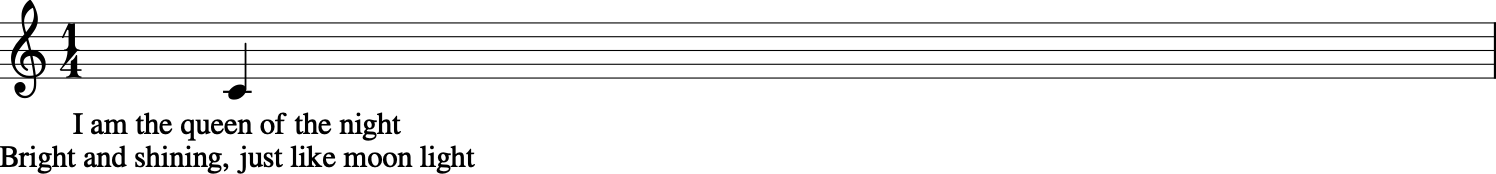

In [104]:
dNote.addLyric("I am the queen of the night")
dNote.addLyric("Bright and shining, just like moon light")
dNote.show()

Obviously music isn't made of just 1 or 2 notes. Thus what matters to us is working with multiple Note objects. To make it simpler to analyse and work with, we can put all the associated notes of interest in a list. Again, by default the duration of every note is a 'quarter'.

In [61]:
note1 = note.Note("C4")
note2 = note.Note("F#4")
noteList = [note1, note2]
print (noteList)
stepList = [s.step for s in noteList]
print (stepList)
print ([i.duration for i in noteList])
    
listPitches = stream1.pitches
print ("\nPrinting pitches of all notes in the stream: ", listPitches)


[<music21.note.Note C>, <music21.note.Note F#>]
['C', 'F']
[<music21.duration.Duration 1.0>, <music21.duration.Duration 1.0>]

Printing pitches of all notes in the stream:  [<music21.pitch.Pitch C4>, <music21.pitch.Pitch F#4>, <music21.pitch.Pitch B4>]

Printing offsets of all notes in the stream:  0.0


Stream objects and its subclasses are fundamental containers for Note, Chord, Clef, Signature. Streams can store other streams. Anytime we want to collect a group of music21 objects, we put them in a stream. The objects in a stream follow an offset pattern. If we have 4/4 measure with 2 half notes, then the first note would be at offset 0.0 and the second one will be at offset 2.0. A Part holds several Measures. If we get a certain measure from the part object using the measures() function, the notes in Part and the returned Measure will have the same reference. Change to any one of those will change the other one too. 

In [68]:
stream1 = stream.Stream()
stream1.append(note1)
stream1.append(note2)
note3 = note.Note("B4")
stream1.append(note3)

stream2 = stream.Stream()
stream2.repeatAppend(note3, 4)

print ("Length of stream 1: ", len(stream1))

print ("Stream 1: ")
stream1.show('text')

print ("Stream 2: ")
stream2.show('text')

Length of stream 1:  3
Stream 1: 
{0.0} <music21.note.Note C>
{1.0} <music21.note.Note F#>
{2.0} <music21.note.Note B>
Stream 2: 
{0.0} <music21.note.Note B>
{1.0} <music21.note.Note B>
{2.0} <music21.note.Note B>
{3.0} <music21.note.Note B>


getElementsByClass() method will iterate the stream to only return the objects of the specified class. 

In [70]:
rest1 = note.Rest()
stream1.append(rest1)
print ("Printing stream of notes: ")
for thisNote in stream1.getElementsByClass(note.Note):
    print (thisNote, thisNote.offset)
print ("\nPrinting stream of notes and rest: ")
for thisNote in stream1.getElementsByClass(["Note", "Rest"]):
    print (thisNote, thisNote.offset)
    
listOffsets = [i.offset for i in stream1]
print ("\nPrinting offsets of notes in the list: ", listOffsets)

Printing stream of notes: 
<music21.note.Note C> 0.0
<music21.note.Note F#> 1.0
<music21.note.Note B> 2.0

Printing stream of notes and rest: 
<music21.note.Note C> 0.0
<music21.note.Note F#> 1.0
<music21.note.Note B> 2.0
<music21.note.Rest rest> 3.0
<music21.note.Rest rest> 4.0

Printing offsets of notes in the list:  [0.0, 1.0, 2.0, 3.0, 4.0]


getOffsetBySite() lets you specify the stream from which you would want to get the offsets. It's a safer way of returning offsets than .offset()

Printing the offset of the 2nd note in stream1
2.0


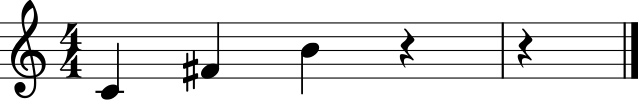

In [102]:
print ("Printing the offset of the 2nd note in stream1")
print (note3.getOffsetBySite(stream1))

stream1.show('midi')
stream1.show()

The classes Note, Chord, whatever is NotRest, is a subclass of NoteRest class. Intuitively, Rest is not a subclass of NotRest. The NotRest class has a .beams property. '.pitch' property is of Note class and not of NotRest class. 

A Score stream consists of Part streams which further consists of Measure streams. Music21 comes with a music21.corpus module that provides access to a large collection of scores, including all the Bach chorales. We can parse the score from the corpus with the parse() function. 

This Score object has six elements: Metadata object, StaffGroup object, followed by four Part objects. 

<music21.stream.Score 0x130084510>
Printing the length of first part:  14
Printing the first measure of first Part:  7


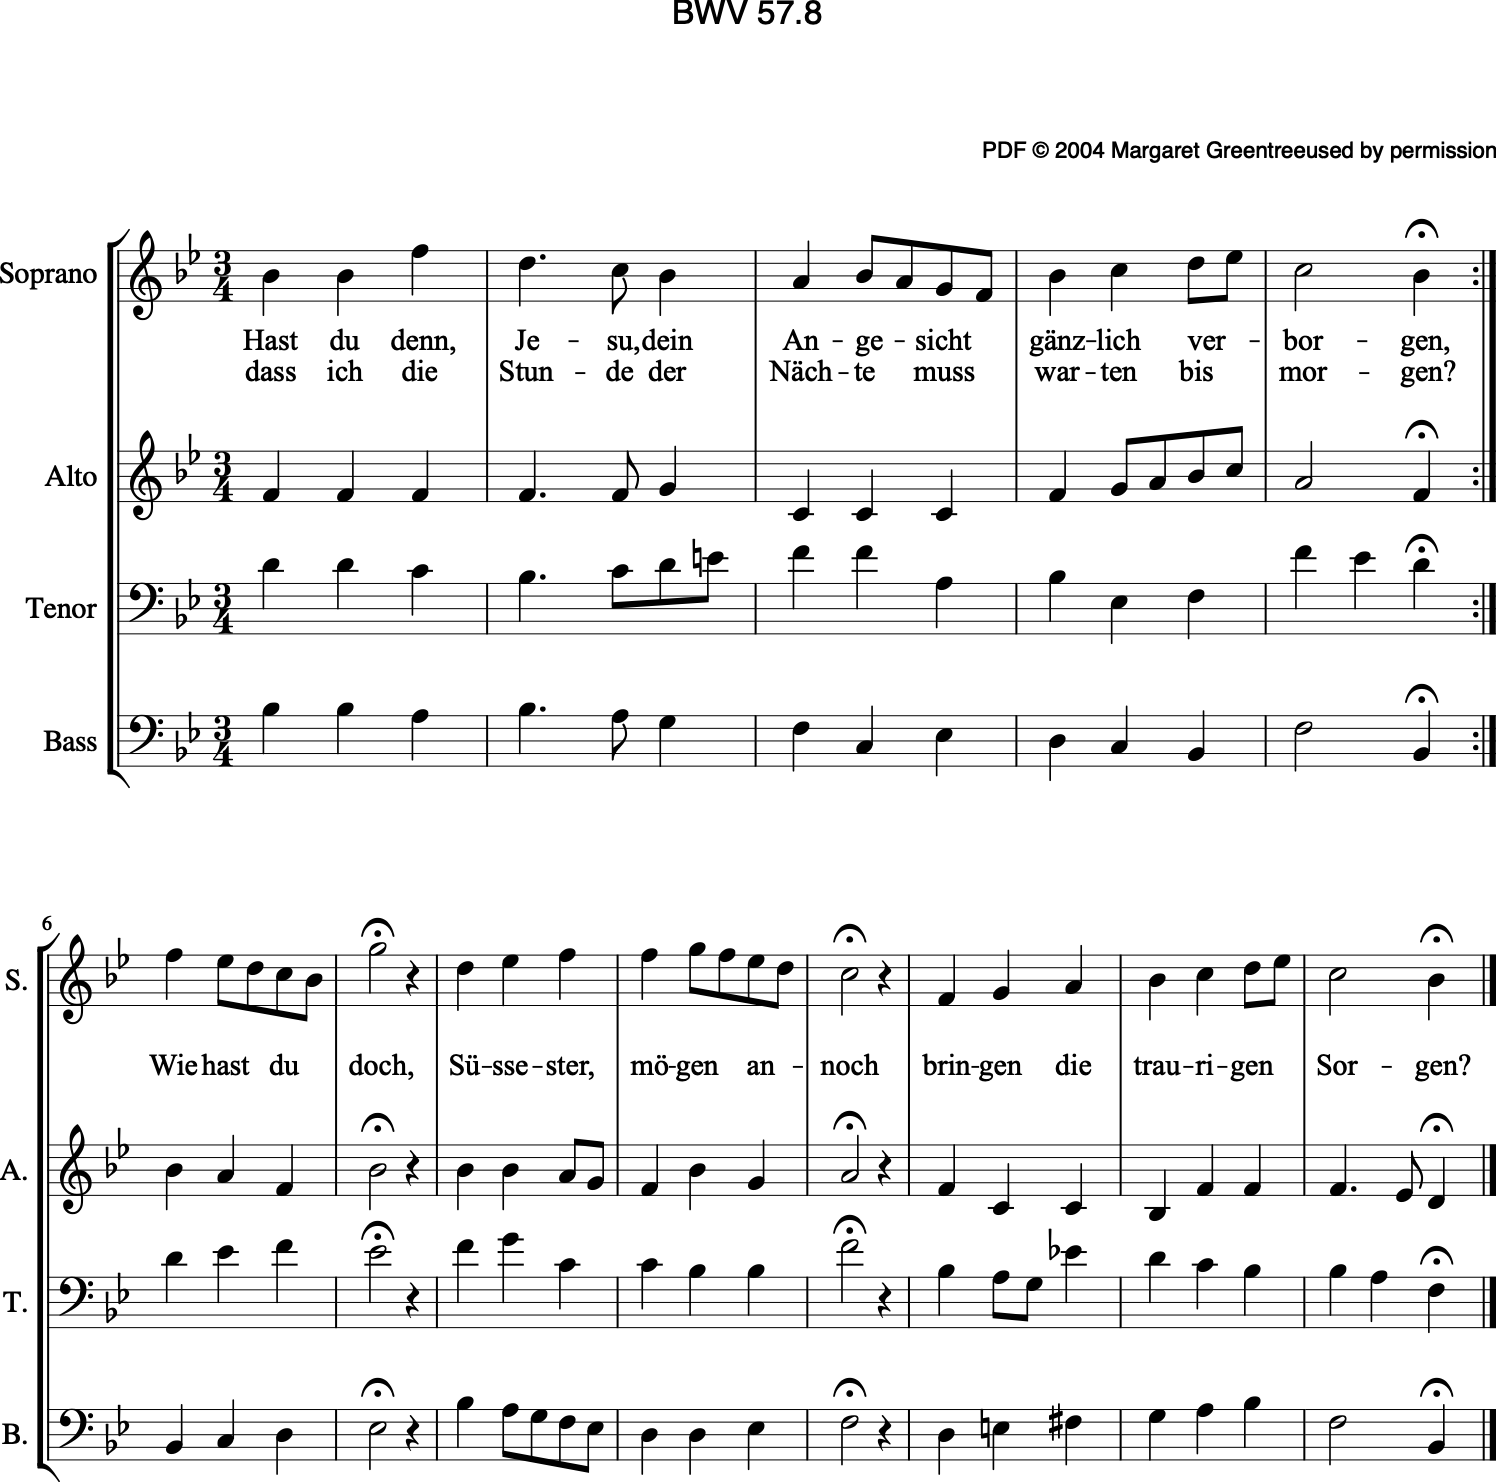

In [115]:
sBach = corpus.parse('bach/bwv57.8')
print (sBach)
print ("Printing the length of first part: ", len(sBach[3]))
print ("Printing the first measure of first Part: ", len(sBach[3][1]))
sBach.show()

Streams can be nested inside one another. .recurse() method is used to traverse every element of the stream, including the elements inside nested streams. 

{0.0} <music21.stream.Part part0>
    {0.0} <music21.stream.Measure 1 offset=0.0>
        {0.0} <music21.note.Note C>
    {4.0} <music21.stream.Measure 2 offset=4.0>
        {0.0} <music21.note.Note D>
{0.0} <music21.stream.Part part1>
    {0.0} <music21.stream.Measure 1 offset=0.0>
        {0.0} <music21.note.Note E>
    {4.0} <music21.stream.Measure 2 offset=4.0>
        {0.0} <music21.note.Note F>


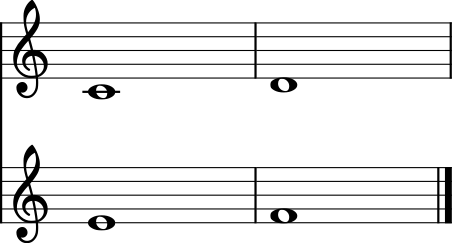

In [114]:
s = stream.Score(id='mainScore')
p0 = stream.Part(id='part0')
p1 = stream.Part(id='part1')

m01 = stream.Measure(number=1)
m01.append(note.Note('C', type='whole'))
m02 = stream.Measure(number=2)
m02.append(note.Note('D', type='whole'))
p0.append([m01,m02])

m11 = stream.Measure(number=1)
m11.append(note.Note('E', type='whole'))
m12 = stream.Measure(number=2)
m12.append(note.Note('F', type='whole'))
p1.append([m11,m12])

s.insert(0, p0)
s.insert(0, p1)
s.show('text')
s.show()

In [90]:
print (s.recurse())
for el in s.recurse():
    print (el.offset, el, el.activeSite)


<music21.stream.iterator.RecursiveIterator for Score:mainScore @:0>
0.0 <music21.stream.Part part0> <music21.stream.Score mainScore>
0.0 <music21.stream.Measure 1 offset=0.0> <music21.stream.Part part0>
0.0 <music21.note.Note C> <music21.stream.Measure 1 offset=0.0>
4.0 <music21.stream.Measure 2 offset=4.0> <music21.stream.Part part0>
0.0 <music21.note.Note D> <music21.stream.Measure 2 offset=4.0>
0.0 <music21.stream.Part part1> <music21.stream.Score mainScore>
0.0 <music21.stream.Measure 1 offset=0.0> <music21.stream.Part part1>
0.0 <music21.note.Note E> <music21.stream.Measure 1 offset=0.0>
4.0 <music21.stream.Measure 2 offset=4.0> <music21.stream.Part part1>
0.0 <music21.note.Note F> <music21.stream.Measure 2 offset=4.0>


The flat property provides access to a flat representation of the Stream.

In [92]:
for el in s.flat:
    print (el.offset, el, el.activeSite)

0.0 <music21.note.Note C> <music21.stream.Score mainScore_flat>
0.0 <music21.note.Note E> <music21.stream.Score mainScore_flat>
4.0 <music21.note.Note D> <music21.stream.Score mainScore_flat>
4.0 <music21.note.Note F> <music21.stream.Score mainScore_flat>


Chord objects can be created by combining multiple Pitches. You can add all the required pitches while creating a chord object. Since there are more than one pitches,  Chord class doesn't have .pitch property, but rather has .pitches property. Chord and Note are subclasses of GeneralNote object and share some properties. There are properties of  Chord class through which you could determine if the chord is ac major or minor triad. 

In [96]:
cMinor = chord.Chord(["C4", "G4", "E-5"])
print ("\nPriting pitches in the chord: ", cMinor.pitches)
if cMinor.isMajorTriad():
    print ("\nIt's a major chord")
elif cMinor.isMinorTriad():
    print("\nIt's a minor chord")



Priting pitches in the chord:  (<music21.pitch.Pitch C4>, <music21.pitch.Pitch G4>, <music21.pitch.Pitch E-5>)

It's a minor chord


The chord might be an inversion. In this case. it becomes important to find the root note of the chord. Chord in root position will have inversion as 0. 

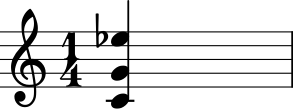

In [106]:
cMinor.inversion()
cMinor.show()

Is the given chord an inversion?  1
Root of the chord:  C4
Bass of the chord:  E3


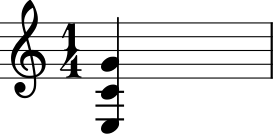

In [107]:
cMajor = chord.Chord(["E3","C4","G4"])
print ("Is the given chord an inversion? ", cMajor.inversion())
print ("Root of the chord: ", cMajor.root())
print ("Bass of the chord: ", cMajor.bass())
cMajor.show()

You can also find out the third, fifth and seventh of the chords

In [109]:
print ("Third of the chord: ", cMajor.third)
print ("Fifth of the chord: ", cMajor.fifth)
print ("Seventh of the chord: ", cMajor.seventh)

Third of the chord:  E3
Fifth of the chord:  G4
Seventh of the chord:  None


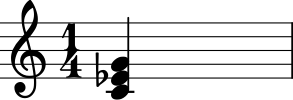

In [113]:
cClosed = cMinor.closedPosition()
cClosed.show()

You can create chords using a bunch of already created note objects or pass a string with note names separated by spaces. 

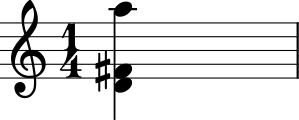

In [116]:
d = note.Note("D4")
fSharp = note.Note("F#4")
a = note.Note("A5")
dMajor = chord.Chord([d, fSharp, a])

dMajor.show()

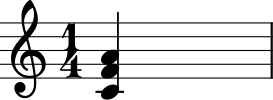

In [118]:
fMajor = chord.Chord("F A C")
fMajor.show()

We can also put Chords inside Streams. 

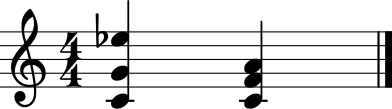

In [119]:
stream1 = stream.Stream()
stream1.append(cMinor)
stream1.append(fMajor)
stream1.show()